# Notebook to analyze HAD data and create train/test splits

HAD Data for subject X can be found at `/data/vision/oliva/blahner/BMDGeneration/mindvis/data/HAD/cifti/task_videoGLM/sub-X/GLMsingle/betas-prepared/prepared_allvoxel_pkl/`

Inside that folder are 181 pkl files for 181 ROIs corresponding to subject X. Inside the pkl file is a dictionary with keys **data_allvoxel** and **stim_order**. 
- **data_allvoxel** contains the zscored fmri data of size (`numvideos`, `numreps`, `numvoxels`). `numvideos` is always 720 and `numreps` is always 1 here. 
- **stim_order** contains a list of length 720 with the video filenames that correspond to the order of videos. So `stim_order[20]` corresponds to the video that evoked the brain activity in `data_allvoxel[20, :, :]`. 

HAD stimuli videos can be found in `/data/vision/oliva/datasets/HumanActionsDataset/stimuli`


**This notebook additionally contains the creation of Olivalab's train and test division for HAD**

In [22]:
import numpy
import pickle as pkl

HAD_STIMULI_PATH = '../data/stimuli_had'
HAD_BETAS_PATH = '../data/betas_cifti_had'

In [24]:
# Load betas file
betas_file_roi_g41 = f'{HAD_BETAS_PATH}/sub01/prepared_allvoxel_pkl/Group41_betas-GLMsingle_type-typeb_z=1.pkl'
with open(betas_file_roi_g41, 'rb') as f:
    betas_roi_g41 = pkl.load(f)

print("keys in the pickle file:",betas_roi_g41.keys())

print("Shape of data_allvoxel:", betas_roi_g41['data_allvoxel'].shape)
print("stim_order:",betas_roi_g41['stim_order'])
len(betas_roi_g41['stim_order'])


keys in the pickle file: dict_keys(['data_allvoxel', 'stim_order', 'roi_indices_hcp'])
Shape of data_allvoxel: (720, 1, 13156)
stim_order: ['v_Drum corps_id_0Qo8FzNJ460_start_28.0_label_1', 'v_Playing kickball_id_HByszN4xrLU_start_106.5_label_1', 'v_Hand car wash_id_HZW1njYbYPI_start_65.5_label_1', 'v_Shuffleboard_id_iyz1BjhV1J4_start_4.5_label_1', 'v_Croquet_id_Q_rVIfFRxbk_start_12.0_label_1', 'v_Fixing bicycle_id_9PhZthMj_do_start_13.5_label_1', 'v_Starting a campfire_id_4GLcWLijqvs_start_44.0_label_1', 'v_Kayaking_id_fSNi_-ThHRk_start_17.0_label_1', 'v_Hand washing clothes_id_inWJtx9wy9A_start_13.5_label_1', 'v_Doing crunches_id_IGQusCP8OyA_start_172.0_label_1', 'v_Dodgeball_id_4q6NYoLXemc_start_1.5_label_1', 'v_Polishing shoes_id_KOnVUshJJCY_start_118.5_label_1', 'v_Hula hoop_id_b7MbntUpa-s_start_116.0_label_1', 'v_Horseback riding_id_4fYOCseWeZM_start_21.0_label_1', 'v_Fun sliding down_id_mY_JVOcwk4M_start_34.5_label_1', 'v_Swimming_id_P7SauSudA0Y_start_155.0_label_1', 'v_Drinking

720

dict_keys(['data_allvoxel', 'stim_order', 'roi_indices_hcp'])
- **data_allvoxel** contains the betas of size (`numvideos`, `numreps`, `numvoxels`). `numvideos` is always 720 and `numreps` is always 1 here. 
- **stim_order** contains the name of the HAD video shown to the user, in the same order as the betas.
- **roi_indices_hcp** allows for matching with HCP resting state data



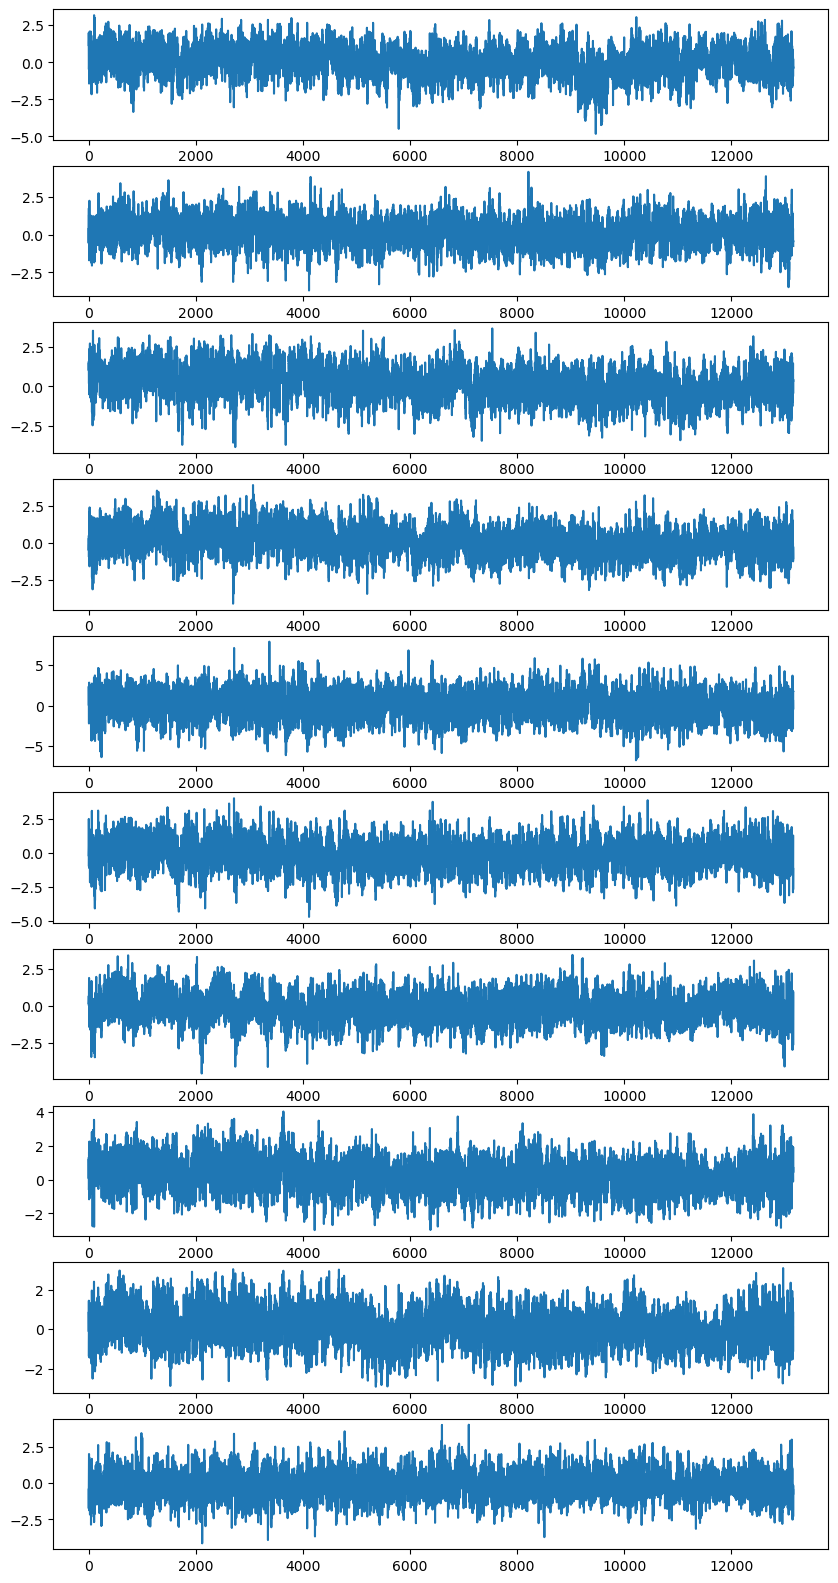

In [21]:
# Plot first 10 vectors
import matplotlib.pyplot as plt
plt.figure(figsize=(10,20))
for i in range(10):
    plt.subplot(10,1,i+1)
    plt.plot(betas_roi_g41['data_allvoxel'][i,0])

plt.show()

# Define Train and Test sets

In [3]:
import os
import json

def make_train_test_set(had_path, test_set_proportion=0.2):
    
    train_set_video_paths = []
    test_set_video_paths = []
    
    for action in sorted(os.listdir(had_path)):
        # take test_set_proportion actions and save them in test_set, the rest is train
        action_path = os.path.join(had_path, action)
        if os.path.isdir(action_path):
            video_paths = sorted([os.path.join(action, video) for video in os.listdir(action_path)])
            print(video_paths)
            test_set_size = int(len(video_paths) * test_set_proportion)
            print("test_set_size for action", action, ":", test_set_size)
            test_set_video_paths.extend(video_paths[:test_set_size])
            train_set_video_paths.extend(video_paths[test_set_size:])

    os.makedirs('../data/metadata_had', exist_ok=True)
    # Save as json
    with open('../data/metadata_had/had_train_set_video_paths.json', 'w') as f:
        json.dump(train_set_video_paths, f)
    with open('../data/metadata_had/had_test_set_video_paths.json', 'w') as f:
        json.dump(test_set_video_paths, f)
    

make_train_test_set('../data/stimuli_had', test_set_proportion=0.2)

['Archery/v_Archery_id_-Pi3uPQ3mzE_start_54.0_label_1.mp4', 'Archery/v_Archery_id_0oPWVPabowc_start_49.5_label_1.mp4', 'Archery/v_Archery_id_1QNtF_NBTIE_start_36.5_label_1.mp4', 'Archery/v_Archery_id_1qwitPAFki0_start_40.5_label_1.mp4', 'Archery/v_Archery_id_2HIsBVVj2fo_start_16.5_label_1.mp4', 'Archery/v_Archery_id_2cUtFiS0Xdc_start_181.5_label_1.mp4', 'Archery/v_Archery_id_2daQv2kWAEU_start_36.0_label_1.mp4', 'Archery/v_Archery_id_36hIfXXtQhk_start_74.0_label_1.mp4', 'Archery/v_Archery_id_57THlHnDkes_start_18.5_label_1.mp4', 'Archery/v_Archery_id_5OMUM9Y3V1o_start_3.5_label_1.mp4', 'Archery/v_Archery_id_5Us1ZoVrBLg_start_59.0_label_1.mp4', 'Archery/v_Archery_id_5ucNa9WQOKA_start_62.0_label_1.mp4', 'Archery/v_Archery_id_6I_FHfKUU50_start_106.0_label_1.mp4', 'Archery/v_Archery_id_6NqDCQ5d_dg_start_38.5_label_1.mp4', 'Archery/v_Archery_id_6odl_pksGD0_start_24.0_label_1.mp4', 'Archery/v_Archery_id_6uRJrwfQzXM_start_7.0_label_1.mp4', 'Archery/v_Archery_id_83J71AE_qSM_start_25.0_label_1.mp